In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(picante)
library(car)
library(dunn.test)
library(ggpubr)
library(viridis)

In [3]:
batrun_t = readRDS("/gpfs/data/gilbert-lab/Lutz/Epomophorus/RDSfiles/bat_t.rds")

In [53]:
batrun.mdf = psmelt(batrun_t)
batrun.mdf = read.csv("/gpfs/data/gilbert-lab/Lutz/Epomophorus/MDFfiles/batrun.mdf.csv")

### Bacterial Taxa by Host Sex & Pregnancy Status

#### Top 10 Bacterial Phyla

In [59]:
N = 10

topN = batrun.mdf %>%
    group_by(Rank2) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank2) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank2")

mdfall.other = batrun.mdf %>%
    mutate(Phylum.other = ifelse(Rank2 %in% topN, as.character(Rank2), "Other")) %>%
    group_by(Pregnant, Sample, Phylum.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdfall.summary = mdfall.other %>%
    group_by(Pregnant, Phylum.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))

write.csv(mdfall.other, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank2_mdfall.bysamples.csv")
write.csv(mdfall.summary, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank2_mdfall.summary.csv")

Selecting by m


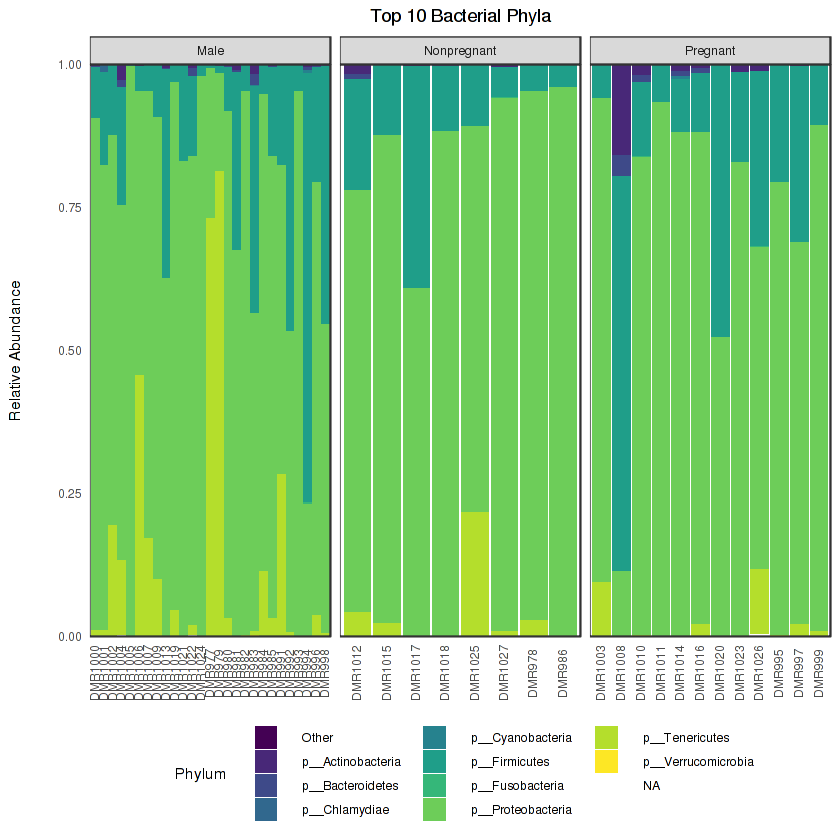

In [61]:
p = ggplot(mdfall.other[order(mdfall.other$Phylum.other),], aes(x=Sample, y = Abundance, fill = Phylum.other))
                        
p = p + facet_wrap(~Pregnant, shrink = TRUE, scales = "free_x") +
    ylab("Relative Abundance")  +
    geom_bar(stat="identity") +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_y_continuous(expand = c(0,0))

p = p + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=9, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              axis.text.x=element_text(angle=90,vjust=0.4),
              #legend.key.size = unit(.25, "mm"),
              legend.spacing.x = unit(.2,"in"),
              axis.title.x=element_blank())

p = p + theme(legend.position="bottom") 

p = p + ggtitle("Top 10 Bacterial Phyla") + theme(plot.title = element_text(hjust = 0.5))

p

#### Top 10 Bacterial Classes

In [62]:
N = 10

topN = batrun.mdf %>%
    group_by(Rank3) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank3) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank3")

mdfall.other = batrun.mdf %>%
    mutate(Class.other = ifelse(Rank3 %in% topN, as.character(Rank3), "Other")) %>%
    group_by(Pregnant, Sample, Class.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdfall.summary = mdfall.other %>%
    group_by(Pregnant, Class.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Class.other))

write.csv(mdfall.other, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank3_mdfall.bysamples.csv")
write.csv(mdfall.summary, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank3_mdfall.summary.csv")

Selecting by m


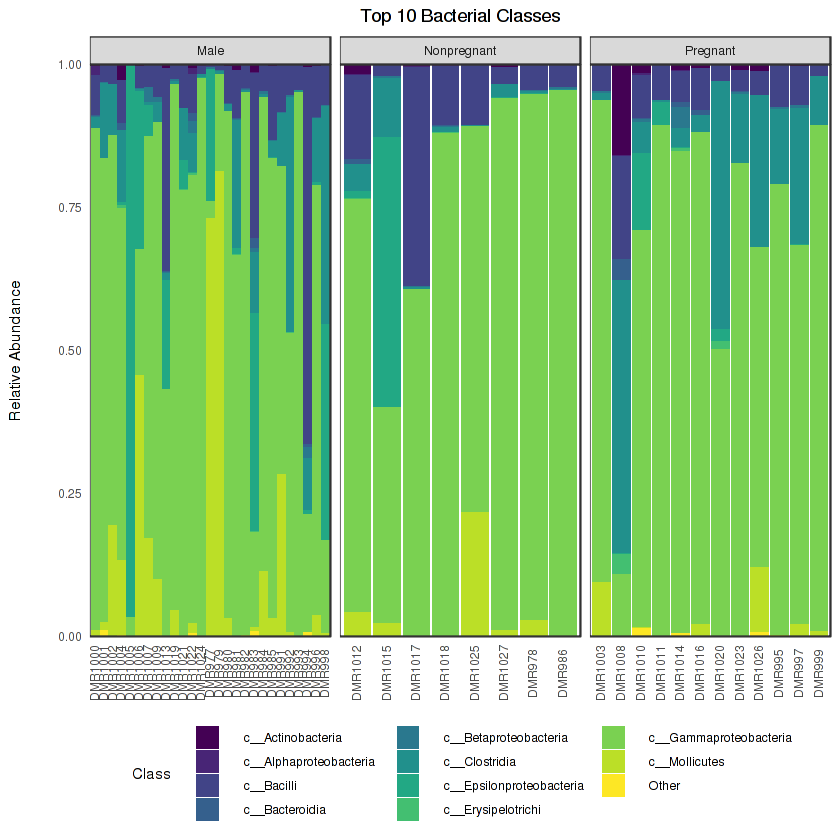

In [63]:
p = ggplot(mdfall.other[order(mdfall.other$Class.other),], aes(x=Sample, y = Abundance, fill = Class.other))
                        
p = p + facet_wrap(~Pregnant, shrink = TRUE, scales = "free_x") +
    ylab("Relative Abundance")  +
    geom_bar(stat="identity") +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_y_continuous(expand = c(0,0))

p = p + guides(fill = guide_legend(title = "Class", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=9, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              axis.text.x=element_text(angle=90,vjust=0.4),
              #legend.key.size = unit(.25, "mm"),
              legend.spacing.x = unit(.2,"in"),
              axis.title.x=element_blank())

p = p + theme(legend.position="bottom") 

p = p + ggtitle("Top 10 Bacterial Classes") + theme(plot.title = element_text(hjust = 0.5))

p

#### Top 10 Bacterial Orders

In [64]:
N = 10

topN = batrun.mdf %>%
    group_by(Rank4) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank4) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank4")

mdfall.other = batrun.mdf %>%
    mutate(Order.other = ifelse(Rank4 %in% topN, as.character(Rank4), "Other")) %>%
    group_by(Pregnant, Sample, Order.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdfall.summary = mdfall.other %>%
    group_by(Pregnant, Order.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Order.other))

write.csv(mdfall.other, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank4_mdfall.bysamples.csv")
write.csv(mdfall.summary, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank4_mdfall.summary.csv")

Selecting by m


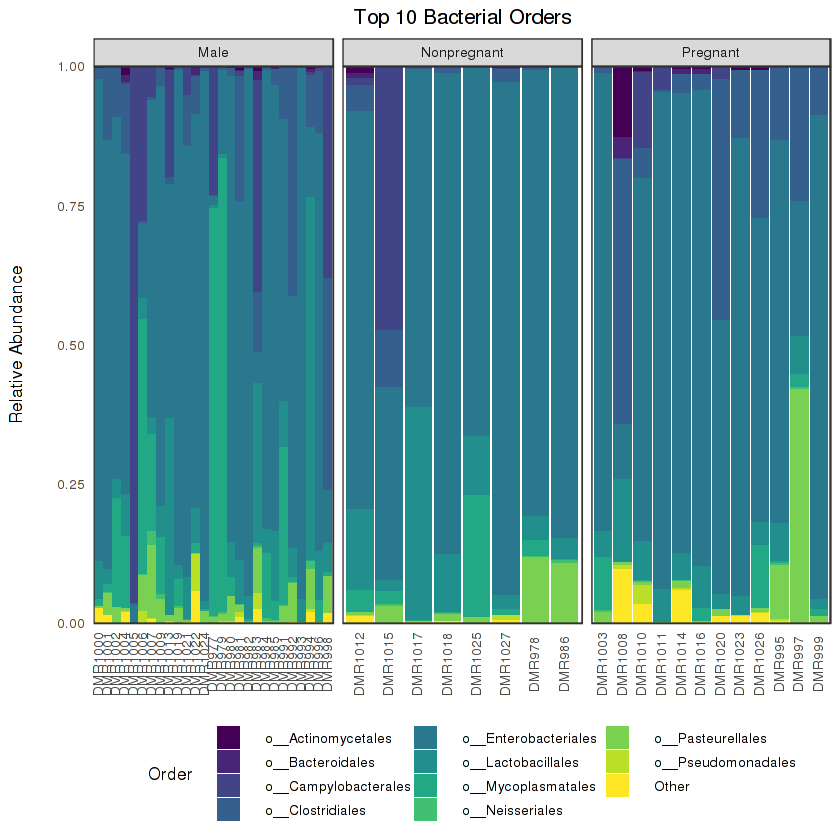

In [65]:
p = ggplot(mdfall.other[order(mdfall.other$Order.other),], aes(x=Sample, y = Abundance, fill = Order.other))
                        
p = p + facet_wrap(~Pregnant, shrink = TRUE, scales = "free_x") +
    ylab("Relative Abundance")  +
    geom_bar(stat="identity") +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_y_continuous(expand = c(0,0))

p = p + guides(fill = guide_legend(title = "Order", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              axis.text.x=element_text(angle=90,vjust=0.4),
              #legend.key.size = unit(.25, "mm"),
              legend.spacing.x = unit(.2,"in"),
              axis.title.x=element_blank())

p = p + theme(legend.position="bottom") 

p = p + ggtitle("Top 10 Bacterial Orders") + theme(plot.title = element_text(hjust = 0.5))

p

#### Top 10 Bacterial Families

In [66]:
N = 10

topN = batrun.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdfall.other = batrun.mdf %>%
    mutate(Family.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Pregnant, Sample, Family.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdfall.summary = mdfall.other %>%
    group_by(Pregnant, Family.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Family.other))

write.csv(mdfall.other, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank5_mdfall.bysamples.csv")
write.csv(mdfall.summary, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Rank5_mdfall.summary.csv")

Selecting by m


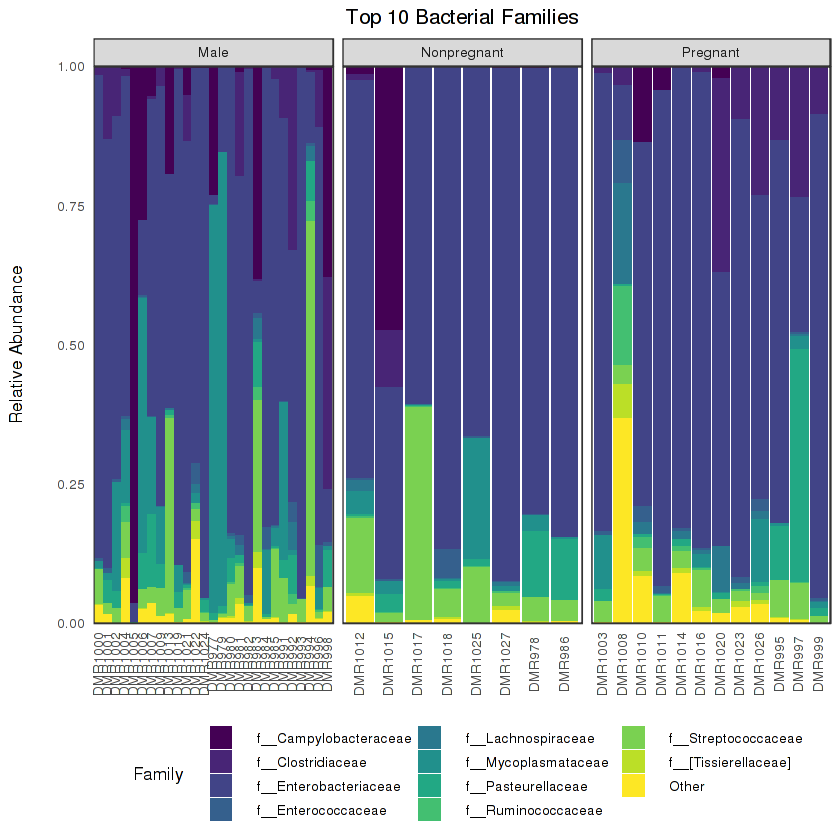

In [67]:
p = ggplot(mdfall.other[order(mdfall.other$Family.other),], aes(x=Sample, y = Abundance, fill = Family.other))
                        
p = p + facet_wrap(~Pregnant, shrink = TRUE, scales = "free_x") +
    ylab("Relative Abundance")  +
    geom_bar(stat="identity") +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_y_continuous(expand = c(0,0))

p = p + guides(fill = guide_legend(title = "Family", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              axis.text.x=element_text(angle=90,vjust=0.4),
              #legend.key.size = unit(.25, "mm"),
              legend.spacing.x = unit(.2,"in"),
              axis.title.x=element_blank())

p = p + theme(legend.position="bottom") 

p = p + ggtitle("Top 10 Bacterial Families") + theme(plot.title = element_text(hjust = 0.5))

p

#### Top 10 Bacterial Taxa - identified to lowest taxonomic classification possible

In [54]:
N = 10

topN = batrun.mdf %>%
    group_by(Taxon) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Taxon) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Taxon")

mdfall.other = batrun.mdf %>%
    mutate(Genus.other = ifelse(Taxon %in% topN, as.character(Taxon), "Other")) %>%
    group_by(Pregnant, Sample, Genus.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdfall.summary = mdfall.other %>%
    group_by(Pregnant, Genus.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Genus.other))

write.csv(mdfall.other, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Taxon_mdfall.bysamples.csv")
write.csv(mdfall.summary, "/gpfs/data/gilbert-lab/Lutz/Epomophorus/RankAbundResults/Taxon_mdfall.summary.csv")

Selecting by m


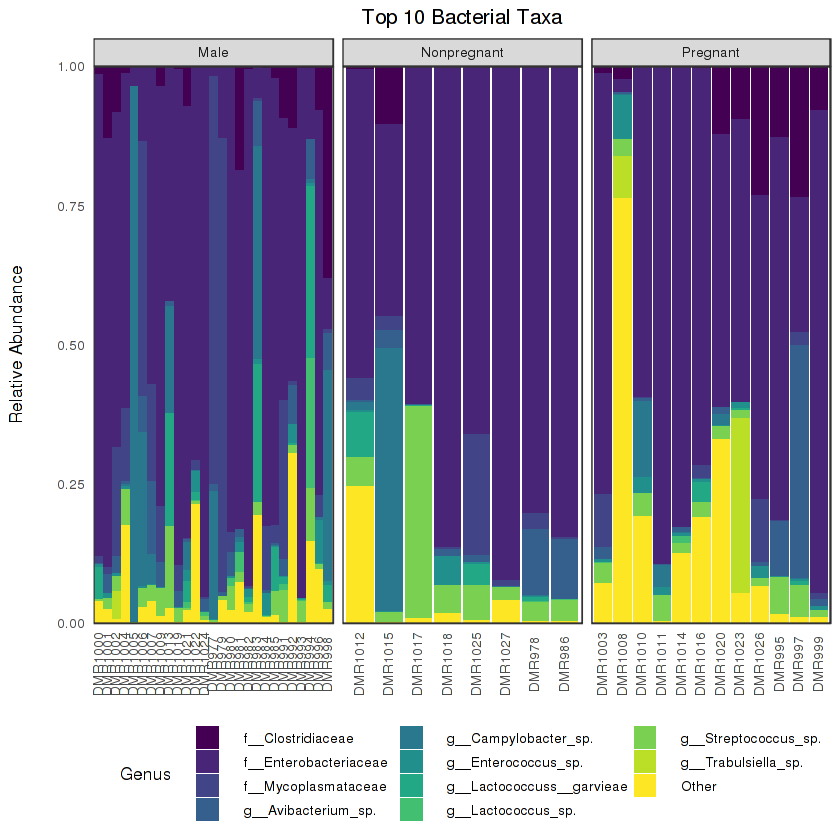

In [57]:
p = ggplot(mdfall.other[order(mdfall.other$Genus.other),], aes(x=Sample, y = Abundance, fill = Genus.other))
                        
p = p + facet_wrap(~Pregnant, shrink = TRUE, scales = "free_x") +
    ylab("Relative Abundance")  +
    geom_bar(stat="identity") +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=1) +
    scale_y_continuous(expand = c(0,0))

p = p + guides(fill = guide_legend(title = "Genus", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              axis.text.x=element_text(angle=90,vjust=0.4),
              #legend.key.size = unit(.25, "mm"),
              legend.spacing.x = unit(.2,"in"),
              axis.title.x=element_blank())

p = p + theme(legend.position="bottom") 

p = p + ggtitle("Top 10 Bacterial Taxa") + theme(plot.title = element_text(hjust = 0.5))

p